### 案例描述

随着人们生活水平不断的提高,红酒越来越受到人们的喜爱。红酒的产量越来越大，然而红酒品质鉴定的手段还是仅靠品酒师的人工品尝打分来判定红酒质量的好坏，显然这种鉴定方式难以满足当今市场的需求。现在有不少学者运用一些机器学习的算法来对红酒质量进行预测研究，使得红酒品质鉴定的速度得到大幅提升并且有着较高的准确率。


 对于红酒品质的分类，可以基于红酒的理化指标(例如：酒精的浓度、pH值、糖的含量、非挥发性酸含量、 挥发性酸含量、柠檬酸含量等)作为特征，建立分类模型，然后对红酒品质进行预测。本案例中，我们将使用UCI数据库中的 Wine Quality Data Set 数据集，利用随机森林分类算法来进行红酒品质的分类。

## 1 数据源
我们使用一份包含1599个样本的关于葡萄牙的Vinho Verde葡萄酒数据集。
每个样本包含12个变量，其中最后一个变量`quality`为预测变量。
变量列表如下：

|变量名称|含义说明|
|:------|:--------|
|fixed acidity |非挥发性酸含量|
|volatile acidity| 挥发性酸含量|
|citric acid |柠檬酸|
|residual sugar |糖含量|
|chlorides |氯化物|
|free sulfur dioxide | 游离二氧化硫|
|total sulfur dioxide | 总二氧化硫|
|density |密度 |
|pH |酸碱度|
|sulphates | 硫酸盐|
|alcohol | 酒精浓度 |
|quality | 品质， 为预测变量|


## 2 数据探索和预处理
首先，使用pandas中的 `read_csv` 函数将数据加载到数据框中：

In [15]:
import numpy as np
import pandas as pd
df = pd.read_csv("/home/xm/Program/ALL-Data/winequality-red.csv",sep=';')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


通过初步观察，发现所有的变量中不存在缺失值（missing value）。
我们可以验证数据中确实没有缺失值。

In [16]:
df_value_ravel = df.values.ravel()
print (u'缺失值数量：',len(df_value_ravel[df_value_ravel==np.nan]))

缺失值数量： 0


## 2.1 处理不平衡数据
由于这是一个分类问题，我们需要查看数据集中的数据是否平衡。用以下代码可以得到每个类别有多少个样本：

In [17]:
print('数据中的各类别样本分布：')
print(df['quality'].value_counts().sort_index())

数据中的各类别样本分布：
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64


我们可以看出，数据中的属于不同类别的样本的分布是不平衡的。
这里我们选择过采样的方法来使数据变得平衡。
在Python中imbalanced-learn包可以用来对不平衡数据进行处理。

In [18]:
from imblearn.over_sampling import RandomOverSampler
X = df.iloc[:,:-1].values
y = df['quality'].values
ros = RandomOverSampler()
X, y = ros.fit_sample(X, y)

过采样后的类别分布为：

In [19]:
print(pd.DataFrame(y)[0].value_counts().sort_index())

3    681
4    681
5    681
6    681
7    681
8    681
Name: 0, dtype: int64


可见，不同类别的样本数量变得平衡。

# 3 模型训练
为了实现红酒品质分类，我们使用 sklearn.ensemble 包中的 RandomForestClassifier 类。
RandomForestClassifier 的 n_estimators 参数为随机森林中单棵决策树的数目。
在本案例中，我们将决策树的棵数 n_estimators 设置为100。

将数据切分成80%的数据作为训练集，20%的数据作为测试集。

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=0)

然后，利用训练集训练随机森林模型。

In [21]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
print(clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


# 4 模型性能评估
首先，使用predict()函数得到上一节训练的随机森林模型在测试集合上的预测结果，然后使用 sklearn.metrics中的相关函数对模型的性能进行评估。

In [22]:
from sklearn import metrics
y_predict = clf.predict(X_test)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test,y_predict))

             precision    recall  f1-score   support

          3       0.99      1.00      0.99       142
          4       1.00      1.00      1.00       129
          5       0.78      0.79      0.79       150
          6       0.77      0.68      0.72       146
          7       0.90      0.99      0.94       125
          8       0.99      1.00      1.00       126

avg / total       0.90      0.90      0.90       818

[[142   0   0   0   0   0]
 [  0 129   0   0   0   0]
 [  2   0 119  28   1   0]
 [  0   0  33  99  13   1]
 [  0   0   0   1 124   0]
 [  0   0   0   0   0 126]]


上述混淆矩阵中对角线的元素表示模型正确预测数，对角元素之和表示模型整体预测正确的样本数。
现在，让我们来通过这个来计算模型在测试集中的预测正确率。

In [23]:
print("Accuracy:", metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.903422982885


可见，训练得到的模型在原始集的20%的测试样本中，预测的正确率（Accuaray）为89.9%左右。

## 5 随机森林的分类间隔（Margins）
随机森林的分类间隔是指森林中正确分类样本的决策树的比例减去错误分类样本决策树的比例。通过平均随机森林在各个样本上的分类间隔得到随机森林的分类间隔。实际中，我们希望分类间隔越大越好，因为大的分类间隔表示我们的分类效果比较稳定，泛化效果更好。代码如下：

In [24]:
average_margin = 0
total_num = len(X_test)
for x,y in zip(X_test,y_test):
    correct_num = 0
    wrong_num = 0
    for tree in clf.estimators_:
        if tree.predict(x.reshape(1,11))+3 == y:
            correct_num += 1
        else: 
            wrong_num += 1
    average_margin += (correct_num - wrong_num)+0.0 / (correct_num + wrong_num)
print ('平均分类间隔Margin:',average_margin/total_num)

平均分类间隔Margin: 67.880195599022


## 6 随机森林的袋外错误率（Out-Of-Bag Error）
对随机森林的每一棵树来说，都有部分样本没有被抽样到进入训练的样本，它们叫做袋外样本。随机森林对袋外样本的预测错误比率被称为袋外错误率。代码如下：

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees we

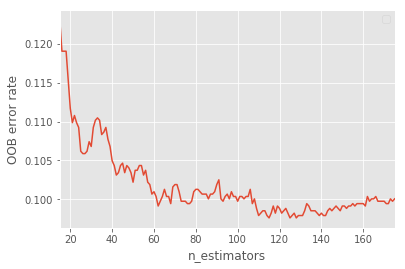

In [25]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

RANDOM_STATE = 123
clf2 = RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE)
# 随机森林中树的数量范围
min_estimators = 15
max_estimators = 175
pair_list = []
for i in range(min_estimators, max_estimators + 1):
    clf2.set_params(n_estimators=i)
    clf2.fit(X_train, y_train)
    oob_error = 1 - clf2.oob_score_
    pair_list.append((i, oob_error))
#生成袋外错误率和树的数量的关系图  

xs, ys = zip(*pair_list)
plt.plot(xs, ys)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# 7 模型的可解释性
随机森林的可解释性通过变量的重要性来进行刻画。某些变量对于模型训练的重要性比较高，有些变量则显得没那么重要。变量的重要程度在随机森林的生成过程中已经获得。在训练好的模型的feature_importances属性之中。通过matplotlib.pyplot包用以下代码作图：

<Figure size 432x288 with 0 Axes>

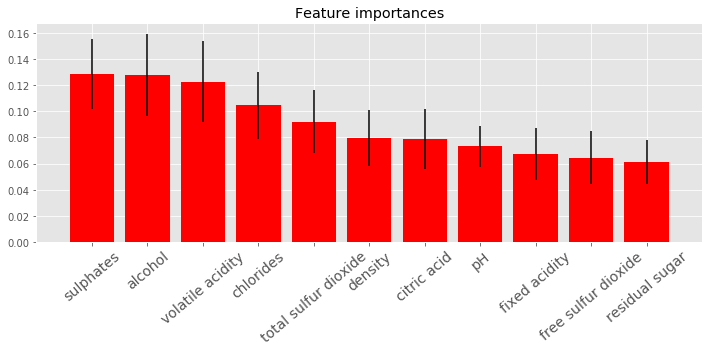

In [26]:
importances = clf.feature_importances_
#计算随机森林中所有的树的每个变量的重要性的标准差
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
#按照变量的重要性排序后的索引
indices = np.argsort(importances)[::-1]
# 绘图过程
plt.figure()
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(fontsize=14) 
plt.xticks(range(X.shape[1]), df.columns.values[:-1][indices],rotation=40)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

可以看出，最重要的属性前3名依次为：alcohol （酒精浓度），volatile acidity （挥发性酸含量），以及sulphates （硫酸盐）。

后续还可可以采取参数调优的方式降低错误率.